In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [5]:
## PSEUDOCODE ##
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3.Group the cities in sets of 50 to log the process as we find the weather data for each city.
#     - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#     - City, country, and date
#     - Latitude and longitude
#     - Maximum temperature
#     - Humidity
#     - Cloudiness
#     - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 1 | banmankhi
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | grootfontein
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | viligili
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | tucumcari
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | kavaratti
Processing Record 23 of Set

Processing Record 42 of Set 4 | pierre
Processing Record 43 of Set 4 | troitskoye
Processing Record 44 of Set 4 | billings
Processing Record 45 of Set 4 | luau
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | teguldet
Processing Record 48 of Set 4 | sokoni
Processing Record 49 of Set 4 | aklavik
Processing Record 50 of Set 4 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | tomatlan
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | caraballeda
Processing Record 9 of Set 5 | cabedelo
Processing Record 10 of Set 5 | yining
Processing Record 11 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 5

Processing Record 28 of Set 8 | chornukhy
Processing Record 29 of Set 8 | veraval
Processing Record 30 of Set 8 | svirsk
Processing Record 31 of Set 8 | ferrandina
Processing Record 32 of Set 8 | anadyr
Processing Record 33 of Set 8 | villamontes
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | mosquera
Processing Record 36 of Set 8 | ponta do sol
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | bayeux
Processing Record 39 of Set 8 | tura
Processing Record 40 of Set 8 | katsuura
Processing Record 41 of Set 8 | antsirabe
Processing Record 42 of Set 8 | burnie
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | husavik
Processing Record 45 of Set 8 | ofaqim
Processing Record 46 of Set 8 | flinders
Processing Record 47 of Set 8 | lake city
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | bocas del toro
Processing Record 50 of Set 8 | sept-iles
Processing Record 1 of Set 9 | neco

Processing Record 21 of Set 12 | roebourne
Processing Record 22 of Set 12 | magadan
Processing Record 23 of Set 12 | dukat
Processing Record 24 of Set 12 | jamame
Processing Record 25 of Set 12 | lethem
Processing Record 26 of Set 12 | yabrud
Processing Record 27 of Set 12 | elbistan
Processing Record 28 of Set 12 | hofn
Processing Record 29 of Set 12 | challapata
Processing Record 30 of Set 12 | kiunga
Processing Record 31 of Set 12 | agirish
Processing Record 32 of Set 12 | taltal
Processing Record 33 of Set 12 | deniliquin
Processing Record 34 of Set 12 | andrews
Processing Record 35 of Set 12 | bull savanna
Processing Record 36 of Set 12 | katobu
Processing Record 37 of Set 12 | zaozerne
Processing Record 38 of Set 12 | qaqortoq
Processing Record 39 of Set 12 | dibulla
Processing Record 40 of Set 12 | cairns
Processing Record 41 of Set 12 | alofi
Processing Record 42 of Set 12 | muravlenko
Processing Record 43 of Set 12 | santa marta
-----------------------------
Data Retrieval Com

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Banmankhi,25.8833,87.1833,76.46,91,94,6.22,IN,2021-10-02 00:25:01
1,Castro,-24.7911,-50.0119,56.71,93,100,2.48,BR,2021-10-02 00:25:01
2,Arraial Do Cabo,-22.9661,-42.0278,70.59,92,70,17.69,BR,2021-10-02 00:22:42
3,Grootfontein,-19.5667,18.1167,62.04,14,0,14.52,NA,2021-10-02 00:25:04
4,Busselton,-33.6500,115.3333,55.09,77,30,14.34,AU,2021-10-02 00:25:04
5,Atuona,-9.8000,-139.0333,78.64,69,55,20.38,PF,2021-10-02 00:25:05
6,Ushuaia,-54.8000,-68.3000,37.06,81,40,20.71,AR,2021-10-02 00:25:06
7,Alice Springs,-23.7000,133.8833,83.75,12,4,17.27,AU,2021-10-02 00:23:20
8,Norman Wells,65.2820,-126.8329,51.84,54,75,13.80,CA,2021-10-02 00:25:06
9,Khatanga,71.9667,102.5000,27.16,94,100,2.17,RU,2021-10-02 00:23:13


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Banmankhi,IN,2021-10-02 00:25:01,25.8833,87.1833,76.46,91,94,6.22
1,Castro,BR,2021-10-02 00:25:01,-24.7911,-50.0119,56.71,93,100,2.48
2,Arraial Do Cabo,BR,2021-10-02 00:22:42,-22.9661,-42.0278,70.59,92,70,17.69
3,Grootfontein,NA,2021-10-02 00:25:04,-19.5667,18.1167,62.04,14,0,14.52
4,Busselton,AU,2021-10-02 00:25:04,-33.6500,115.3333,55.09,77,30,14.34
5,Atuona,PF,2021-10-02 00:25:05,-9.8000,-139.0333,78.64,69,55,20.38
6,Ushuaia,AR,2021-10-02 00:25:06,-54.8000,-68.3000,37.06,81,40,20.71
7,Alice Springs,AU,2021-10-02 00:23:20,-23.7000,133.8833,83.75,12,4,17.27
8,Norman Wells,CA,2021-10-02 00:25:06,65.2820,-126.8329,51.84,54,75,13.80
9,Khatanga,RU,2021-10-02 00:23:13,71.9667,102.5000,27.16,94,100,2.17


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

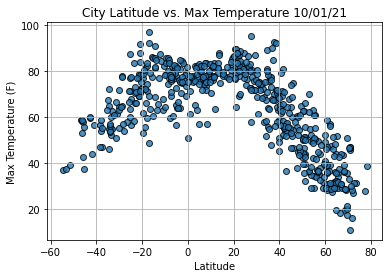

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

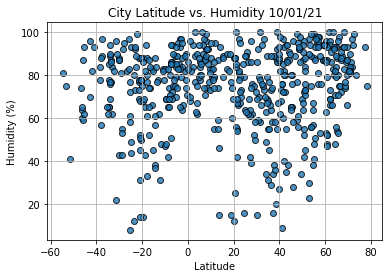

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

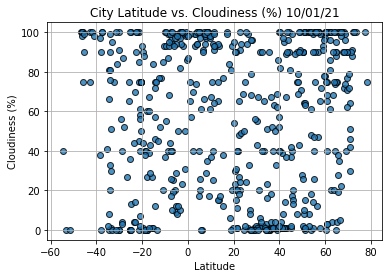

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

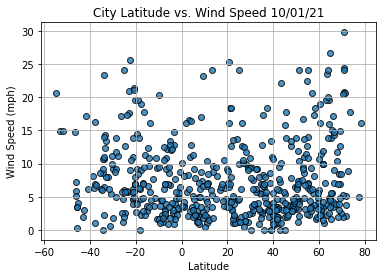

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

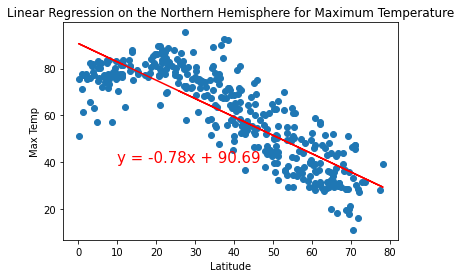

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

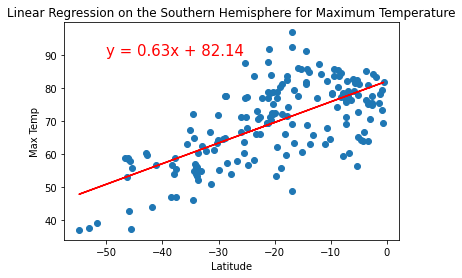

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

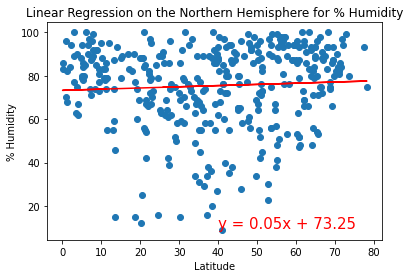

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

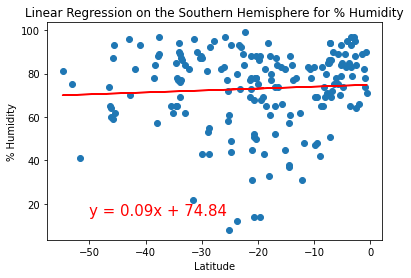

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

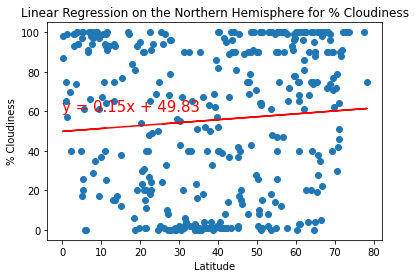

In [22]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,60))

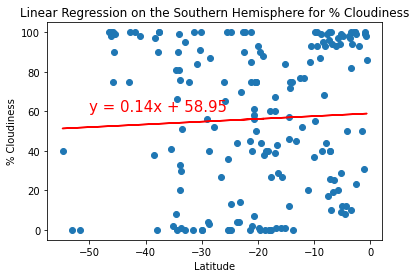

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

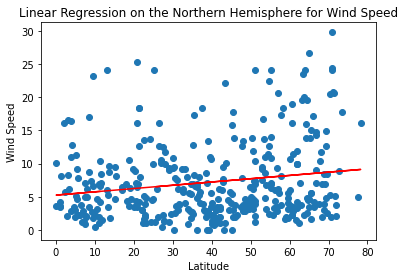

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

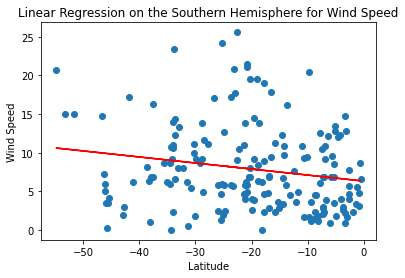

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))